In [53]:
%aiida
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
from matplotlib import pyplot as plt
from pymatgen.io.vasp.outputs import Outcar
from pymatgen.io.vasp.outputs import Oszicar
from pymatgen.io.vasp.inputs import Poscar
from twinpy.plot.base import line_chart
import numpy as np
import os

In [256]:
# bulk_energy = -3.4403421  # k17 17 10
bulk_energy = -3.4391407
# bulk_energy = -3.438

In [257]:
def get_energy_per_atom(dirname):
    pos = Poscar.from_file(os.path.join(dirname, 'POSCAR'))
    # outcar = Outcar(os.path.join(dirname, 'OUTCAR'))
    oszicar = Oszicar(os.path.join(dirname, 'OSZICAR'))
    atoms = pos.natoms[0]
    # energy = outcar.final_energy  # F
    # energy = outcar.final_energy  # F
    energy = oszicar.final_energy   # E0
    return energy, atoms

In [265]:
# dirname = "/home/mizo/vega/project/Mg_twin/layers/relax/l06"
# relax_dir = "/home/mizo/vega/project/Mg_twin/layers/relax"
relax_dir = "/home/mizo/vega/project/Mg_twin/relax"

In [266]:
energy, atoms = get_energy_per_atom(dirname)
print(energy)
print(atoms)

-47.498423 eV
28


In [267]:
A = pos.structure.lattice.a * pos.structure.lattice.b
A

23.89909923444891

In [268]:
energies = []
names = []
natoms = []
lst = os.listdir(relax_dir)
lst.sort()
for name in lst:
    print(name)
    energy, atoms = get_energy_per_atom(os.path.join(relax_dir, name))
    energies.append(energy)
    names.append(name)
    natoms.append(atoms)

d-0.06
d-0.12
d0
d0.06
d0.12
d0.18


In [269]:
excess_energies = []
for energy, natom in zip(energies, natoms):
    excess_energy = energy - bulk_energy * (natom/2)
    excess_energies.append(excess_energy)
print(excess_energies)
print(natoms)
print(bulk_energy)

[0.44085759999999397, 0.4781765999999976, 0.4191605999999979, 0.41261859999999473, 0.4209475999999981, 0.4422005999999925]
[36, 36, 36, 36, 36, 36]
-3.4391407


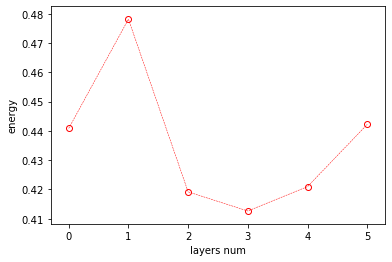

In [271]:
fig = plt.figure()
ax = fig.add_subplot(111)
# line_chart(ax, layers, excess_energies, "layers num", "energy")
line_chart(ax, [i for i in range(len(excess_energies))], excess_energies, "layers num", "energy")

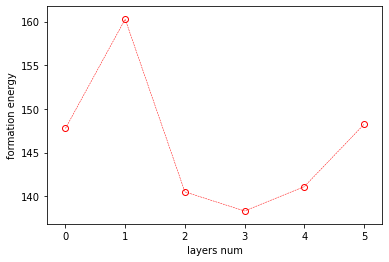

In [272]:
eV = 1.6022 * 10 ** (-16)
ang = 10 ** (-10)
unit = eV / ang ** 2
formation = np.array(excess_energies) / (2*A) * unit
fig = plt.figure()
ax = fig.add_subplot(111)
# line_chart(ax, layers, formation, "layers num", "formation energy")
line_chart(ax, [i for i in range(len(formation))], formation, "layers num", "formation energy")

In [157]:
oszicar = Oszicar(os.path.join(relax_dir, 'l06', 'OSZICAR'))
outcar = Outcar(os.path.join(relax_dir, 'l06', 'OUTCAR'))

In [160]:
oszicar.ionic_steps

[{'F': -47.49924, 'E0': -47.498423, 'dE': -0.00245113}]